In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

import os
imgdir = 'output_images'
if not os.path.isdir(imgdir):
    os.mkdir(imgdir)

In [2]:
xlbl = 'bananas bought'
ylbl = 'bananas sold'
NUM_DATA = 10

In [3]:

def get_y(x):
    y = x + np.random.randint(-3, 3, size=(len(x), 1)) - x **2 / 150 - (x > 40) * 10 - (x < 30) * 10
    return y

In [4]:
np.random.seed(0)
x = np.random.randint(20, 50, size=(NUM_DATA, 1))
y = get_y(x)

In [5]:
np.corrcoef(x.flatten(), y.flatten())

array([[1.        , 0.81790002],
       [0.81790002, 1.        ]])

In [6]:
def plot_data():
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='real sales')
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title('store banana sales vs received')

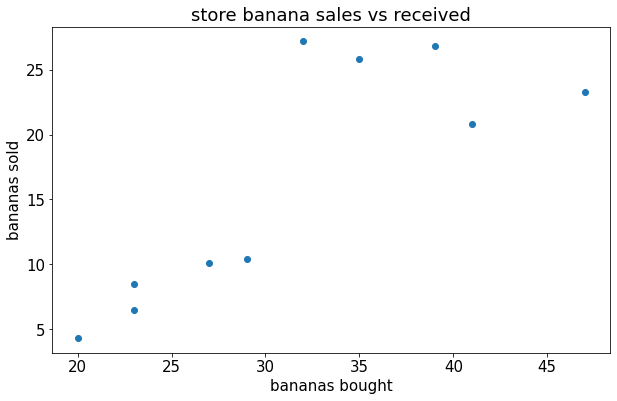

In [7]:
plot_data()
plt.savefig(os.path.join(imgdir, 'raw_data.jpg'))

In [8]:
lr = Ridge().fit(x, y)

In [9]:
lr.coef_, lr.intercept_

(array([[0.85137712]]), array([-10.52885035]))

In [10]:
vizx = np.expand_dims(np.linspace(x.min()-2, x.max() + 2, 1000), -1)

lry = lr.predict(vizx)

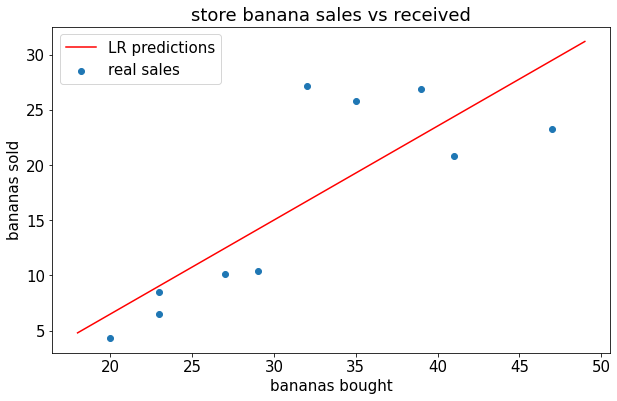

In [11]:
plot_data()
plt.plot(vizx, lry, c='red', label='LR predictions')
plt.legend()
plt.savefig(os.path.join(imgdir, 'linear_regression.jpg'))

In [12]:
feat8 = PolynomialFeatures(8).fit_transform(x)
mean, std = feat8.mean(0), feat8.std(0) + 1
feat8 = (feat8 - mean)/std

vizx8 = PolynomialFeatures(8).fit_transform(vizx)
vizx8 = (vizx8 - mean)/std

lr8 = Ridge(0).fit(feat8, y)
lr8y = lr8.predict(vizx8)

In [13]:
lr8.coef_[:,1:].shape

(1, 8)

In [14]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (lr8.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(lr8.intercept_[0].round())

'The model learned y = x^1 * -178410560.69 + x^2 * 40995572492.44 + x^3 * -4980321973942.21 + x^4 * 366554508424328.2 + x^5 * -1.7329856515010806e+16 + x^6 * 5.1832020263029146e+17 + x^7 * -8.966280783536896e+18 + x^8 * 6.851100949731862e+19 + 16.0'

In [15]:
lr8.coef_, lr8.intercept_

(array([[ 0.00000000e+00, -5.64590382e+06,  3.83566359e+07,
         -1.29658068e+08,  2.52335257e+08, -3.02739577e+08,
          2.22432241e+08, -9.21407190e+07,  1.65228085e+07]]),
 array([16.37466669]))

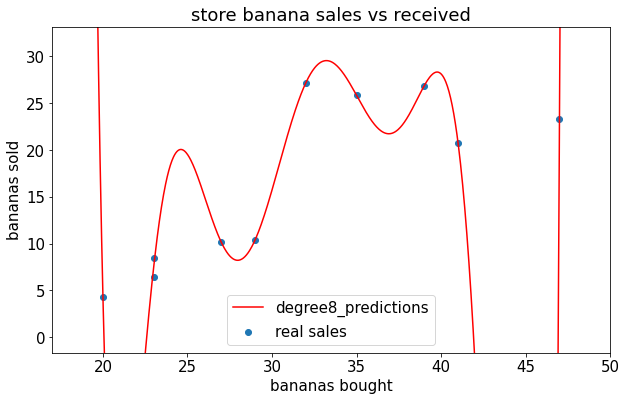

In [16]:
buffer = 3
plot_data()
plt.plot(vizx, lr8y, c='red', label='degree8_predictions')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'degree8_predictions.jpg'))

In [17]:
lr8.coef_

array([[ 0.00000000e+00, -5.64590382e+06,  3.83566359e+07,
        -1.29658068e+08,  2.52335257e+08, -3.02739577e+08,
         2.22432241e+08, -9.21407190e+07,  1.65228085e+07]])

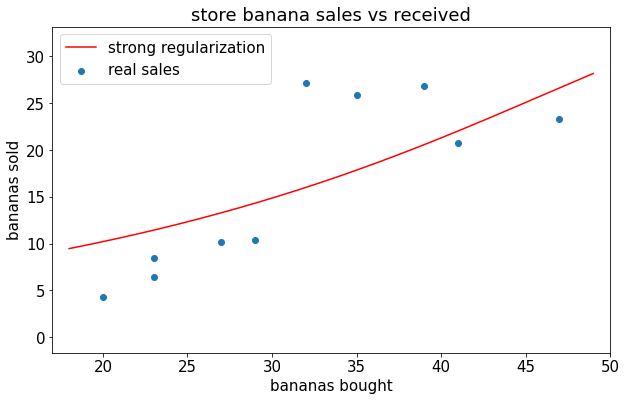

In [18]:

regs = Ridge(10).fit(feat8, y)
ystrong = regs.predict(vizx8)

plot_data()
plt.plot(vizx, ystrong, c='red', label='strong regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'strongreg_predictions.jpg'))

In [19]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regs.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regs.intercept_[0].round())

'The model learned y = x^1 * 59.24 + x^2 * 1757.94 + x^3 * 45648.32 + x^4 * 1098860.51 + x^5 * 21446484.26 + x^6 * 122576088.95 + x^7 * -20436850507.36 + x^8 * -1737882623019.21 + 16.0'

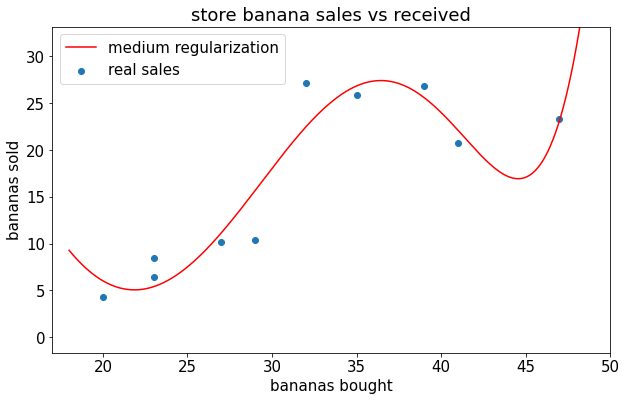

In [20]:

regm = Ridge(1e-5).fit(feat8, y)
ymed = regm.predict(vizx8)

plot_data()
plt.plot(vizx, ymed, c='red', label='medium regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'medium_reg_predictions.jpg'))

In [21]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regm.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regm.intercept_[0].round())

'The model learned y = x^1 * -1566.15 + x^2 * -93967.23 + x^3 * 8166658.02 + x^4 * 315272903.31 + x^5 * -3906750382.64 + x^6 * -782741024619.71 + x^7 * -25155033248094.24 + x^8 * 1540247134805556.2 + 16.0'

C:\Users\wslee\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29368e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


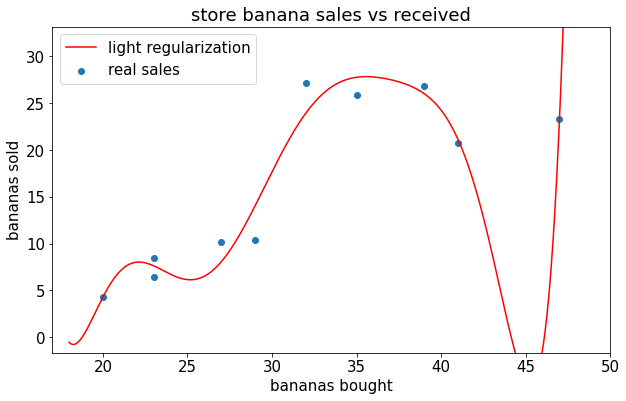

In [22]:

regl = Ridge(1e-20).fit(feat8, y)
ylight = regl.predict(vizx8)

plot_data()
plt.plot(vizx, ylight, c='red', label='light regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'lightreg_predictions.jpg'))

In [23]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regl.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regl.intercept_[0].round())

'The model learned y = x^1 * -9930052.1 + x^2 * 2424895298.24 + x^3 * -311179602753.76 + x^4 * 24055319705101.47 + x^5 * -1188261051542857.8 + x^6 * 3.696020604133602e+16 + x^7 * -6.622287590847223e+17 + x^8 * 5.222869956435355e+18 + 16.0'

In [24]:
def plot_data(figsize=(10,4)):
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=figsize)
    plt.scatter(x, y, label='real sales')
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title('store banana sales vs received')

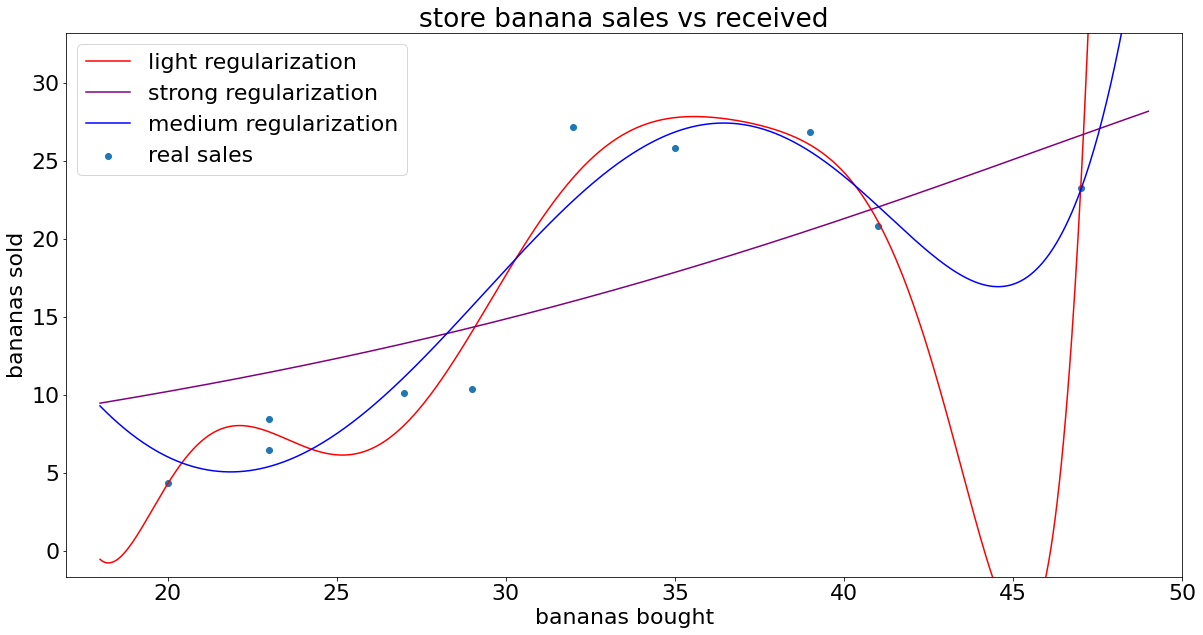

In [25]:

plot_data(figsize=(20,10))
plt.plot(vizx, ylight, c='red', label='light regularization')
plt.plot(vizx, ystrong, c='purple', label='strong regularization')
plt.plot(vizx, ymed, c='blue', label='medium regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'allreg.jpg'))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
np.random.seed(0)
NUM_DATA_VALIDATE = 20
x = np.random.randint(20, 50, size=(NUM_DATA_VALIDATE, 1))
y = get_y(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .5)

In [28]:
x_train_features, x_test_features = [
    PolynomialFeatures(8).fit_transform(xmat) for xmat in [x_train, x_test]]

errors = {}
for reg in [100, 1., 1e-5, 1e-20]:
    mdl = Ridge(reg).fit(x_train_features, y_train)
    yhat = mdl.predict(x_test_features)
    error = np.square(y_test - yhat).mean()
    errors[reg] = error

In [29]:
pd.Series(errors).to_frame()

NameError: name 'errors' is not defined

C:\Users\wslee\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25399e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\wslee\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03671e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\wslee\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05453e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\wslee\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25399e-47): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


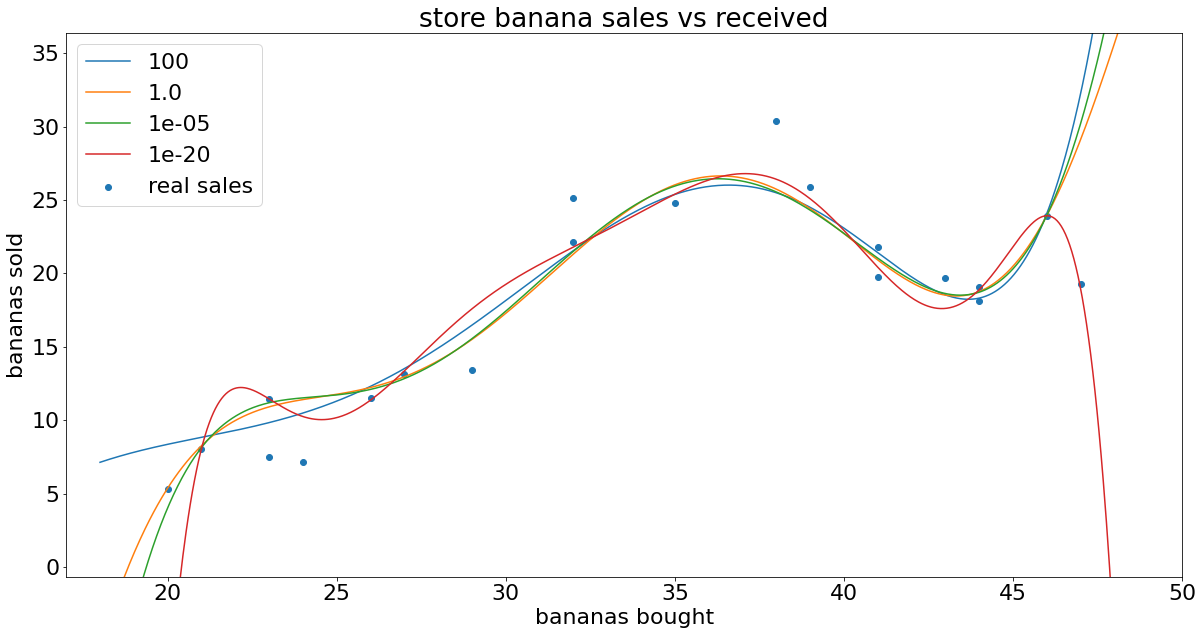

In [30]:
errors = {}
plot_data(figsize=(20,10))
vizx = np.expand_dims(np.linspace(x.min()-2, x.max() + 2, 1000), -1)
vizx8 = PolynomialFeatures(8).fit_transform(vizx)

lry = lr.predict(vizx)
for reg in [100, 1., 1e-5, 1e-20]:
    mdl = Ridge(reg).fit(x_train_features, y_train)
    yhat = mdl.predict(x_test_features)
    error = np.square(y_test - yhat).mean()
    errors[reg] = error
    yhatvix = mdl.predict(vizx8)
    plt.plot(vizx, yhatvix, label=reg)
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()

In [31]:
vizx.shape

(1000, 1)

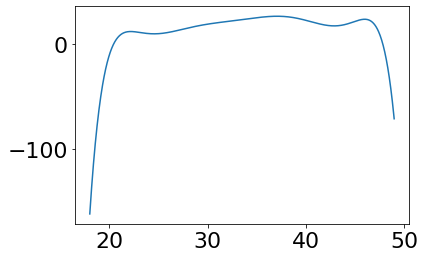

In [32]:
plt.plot(vizx, yhatvix)